*CLIQUE*

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, homogeneity_score, consensus_score

# https://pyclustering.github.io/docs/0.9.0/html/d2/d4f/classpyclustering_1_1cluster_1_1clique_1_1clique.html
#!pip install pyclustering
from pyclustering.cluster.clique import clique, clique_visualizer

In [4]:
iris = load_iris()
X = iris.data
y = iris.target

In [5]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [6]:
threshold = 0
cl = clique(X, amount_intervals=5, density_threshold=3)
cl.process()

cl_clusters = cl.get_clusters()

In [7]:
print("Broj pronađenih klastera:", len(cl_clusters))

Broj pronađenih klastera: 2


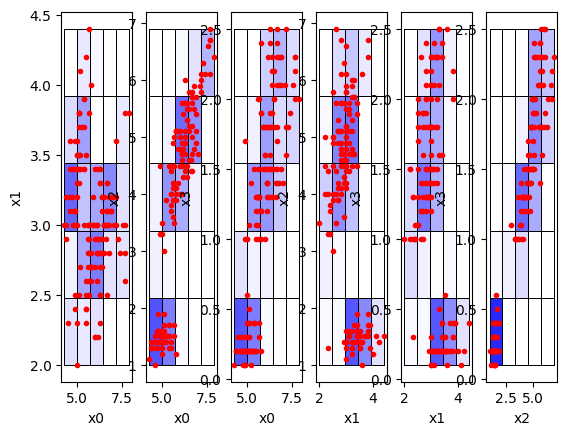

In [8]:
cells = cl.get_cells()
clique_visualizer.show_grid(cells, X)

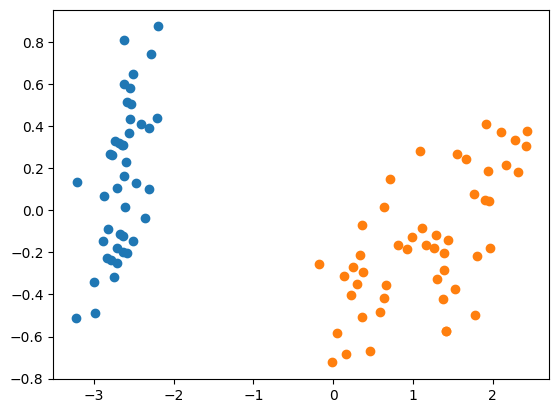

In [9]:
# Napomena: Nedostajuće tačke predstavljanju elemenate van granica
for i in range(len(cl_clusters)):
    cluster = cl_clusters[i]
    _ = plt.scatter(X_pca[cluster, 0], X_pca[cluster, 1])

In [13]:
# https://pypi.org/project/sklearn-som/
#!pip install sklearn-som
from sklearn_som.som import SOM

In [14]:
iris_som = SOM(m=3, n=1, dim=X.shape[1]) # []-[]-[]
iris_som.fit(X)

In [15]:
som_clusters = iris_som.predict(X)

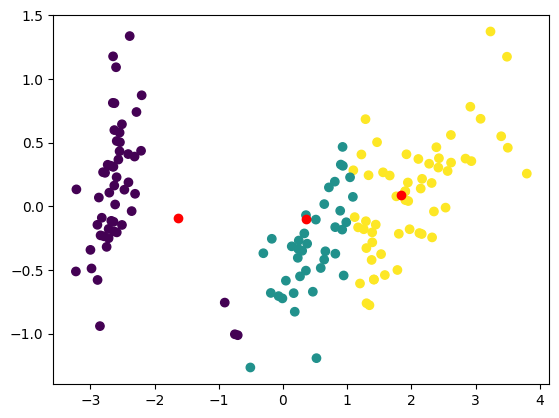

In [16]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=som_clusters)

C_pca = pca.transform(iris_som.weights)
plt.scatter(C_pca[:, 0], C_pca[:, 1], c='red')

In [17]:
silhouette_score(X, som_clusters, metric='euclidean')

0.49432313159552166

In [18]:
homogeneity_score(labels_true=y, labels_pred=som_clusters)

0.7499233433327586